In [1]:
%matplotlib inline
import NK_search_bulk_scan_thresh as bulk
import scipy.stats as st
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import outputToCSV as out
import numpy as np

CHUNK_FLAG = 1
RUNS = 100

 ----------------------------------------------------
NK search (Version 1.0)

----------------------------------------------------

By Ron Tidhar & Tim Ott

----------------------------------------------------


In [17]:
#threshold_range = np.arange(7)
D_range = range(3,6)

In [ ]:
#Vary learning threshold, then show that if you move domains and making 1 change you lose out big time
#Can I also show this graph for different sizes? 3x2 - 3x5, threshold of 0 - 7
P = 3
kw = .75
kb = .25
ss_prob = 0.75

#threshold_range = np.arange(7)
#D_range = range(3,5)
threshold_results = []

for D in D_range:
    max_thresh = 2**D
    print(D)
    threshold_range = range(0,max_thresh+1,int(max_thresh/8))
    for threshold in threshold_range:
        filename = "NK_landscape_" + "P_" + str(P) + "_D_" + str(D) + "_K_within_" + str(kw) + "_K_between_" + str(kb) + "_i_100.npy"
        print("Doing threshold: "+str(threshold))
        temp_result = bulk.main(filename, RUNS, threshold, CHUNK_FLAG, ss_prob)
        threshold_results.append(temp_result)

#Output the above results
col_names = []
flat_results = []
outfile = 'thresholdscan_exp.csv'

(flat_results) = out.flatten_results(threshold_results)
col_names = flat_results[0].keys()
out.out_to_csv(col_names, flat_results, outfile)

3
Doing threshold: 0
Simulating NK_landscape_P_3_D_3_K_within_0.75_K_between_0.25_i_100.npy... Finished!
Doing threshold: 1
Simulating NK_landscape_P_3_D_3_K_within_0.75_K_between_0.25_i_100.npy... Finished!
Doing threshold: 2
Simulating NK_landscape_P_3_D_3_K_within_0.75_K_between_0.25_i_100.npy... Finished!
Doing threshold: 3
Simulating NK_landscape_P_3_D_3_K_within_0.75_K_between_0.25_i_100.npy... Finished!
Doing threshold: 4
Simulating NK_landscape_P_3_D_3_K_within_0.75_K_between_0.25_i_100.npy... Finished!
Doing threshold: 5
Simulating NK_landscape_P_3_D_3_K_within_0.75_K_between_0.25_i_100.npy... Finished!
Doing threshold: 6
Simulating NK_landscape_P_3_D_3_K_within_0.75_K_between_0.25_i_100.npy... Finished!
Doing threshold: 7
Simulating NK_landscape_P_3_D_3_K_within_0.75_K_between_0.25_i_100.npy... Finished!
Doing threshold: 8
Simulating NK_landscape_P_3_D_3_K_within_0.75_K_between_0.25_i_100.npy... Finished!
4
Doing threshold: 0
Simulating NK_landscape_P_3_D_4_K_within_0.75_K_be

In [19]:
#This code would input the file made previously for threshold... faster than doing again.
flat_results_threshold = []
results_threshold = []
infile = 'thresholdscan_exp.csv'
flat_results_threshold = out.in_from_csv(infile)
results_threshold = out.unflatten_results(flat_results_threshold)

In [20]:
#Threshold results needs an array length of thresh x length of D
DW_FIT = np.array([[float('nan') for x in range(len(threshold_range))] for y in range(len(D_range))])
LOCAL_FIT = np.array([[float('nan') for x in range(len(threshold_range))] for y in range(len(D_range))])
CHUNKY_FIT = np.array([[float('nan') for x in range(len(threshold_range))] for y in range(len(D_range))])
DW_CI = np.array([[float('nan') for x in range(len(threshold_range))] for y in range(len(D_range))])
LOCAL_CI = np.array([[float('nan') for x in range(len(threshold_range))] for y in range(len(D_range))])
CHUNKY_CI = np.array([[float('nan') for x in range(len(threshold_range))] for y in range(len(D_range))])
DW_SCAN = np.array([[float('nan') for x in range(len(threshold_range))] for y in range(len(D_range))])
DW_SCAN_CI = np.array([[float('nan') for x in range(len(threshold_range))] for y in range(len(D_range))])
LOCAL_SCAN = np.array([[float('nan') for x in range(len(threshold_range))] for y in range(len(D_range))])
LOCAL_SCAN_CI = np.array([[float('nan') for x in range(len(threshold_range))] for y in range(len(D_range))])
for result in results_threshold:
    index1 = int(result['D'])-3
    index2 = int(float(result['threshold'])/(2**index1))
    DW_FIT[index1,index2] = float(result['dw_result']['norm_fit'])
    DW_CI[index1,index2] = float(result['dw_result']['fit_conf'])
    DW_SCAN[index1,index2] = float(result['dw_result']['avg_scans'])
    DW_SCAN_CI[index1,index2] = float(result['dw_result']['scan_conf'])
    LOCAL_FIT[index1,index2] = float(result['local_result']['norm_fit'])
    LOCAL_CI[index1,index2] = float(result['local_result']['fit_conf'])
    LOCAL_SCAN[index1,index2] = float(result['local_result']['avg_scans'])
    LOCAL_SCAN_CI[index1,index2] = float(result['local_result']['scan_conf'])
    CHUNKY_FIT[index1,index2] = float(result['chunky_result']['norm_fit'])
    CHUNKY_CI[index1,index2] = float(result['chunky_result']['fit_conf'])

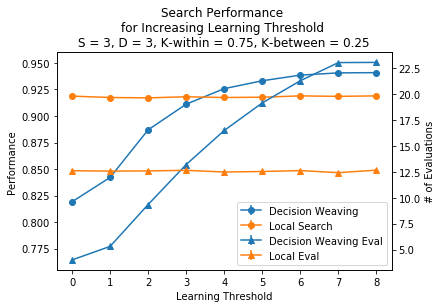

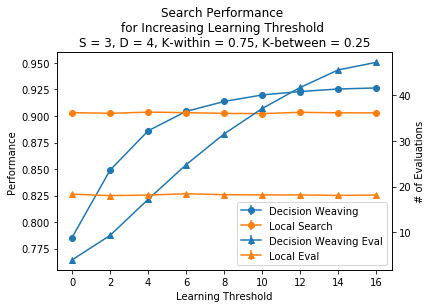

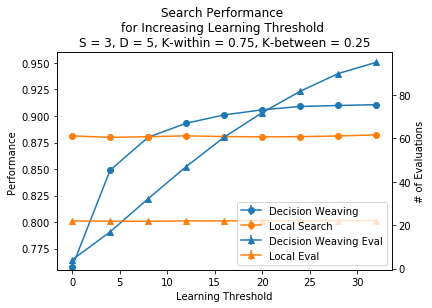

In [32]:
P = results_threshold[0]['P']
kw = results_threshold[0]['Kw']
kb = results_threshold[0]['Kb']
#Trying to plot change in threshold
for d in D_range:
    title_str = "Search Performance \nfor Increasing Learning Threshold \nS = "+str(P)+", D = "+str(d)+", K-within = "+str(kw)+", K-between = "+str(kb)
    max_thresh = 2**d
    threshold_range = range(0,max_thresh+1,int(max_thresh/8))
   
    index = int(d)-3
    plt.figure()
    ax = plt.gca()
    ax.errorbar(threshold_range, DW_FIT[index], yerr=DW_CI[index], fmt='-o', label='Decision Weaving')
    ax.errorbar(threshold_range, LOCAL_FIT[index], yerr=LOCAL_CI[index], fmt='-o', label='Local Search')
    #plt.errorbar(threshold_range, CHUNKY_FIT[index], yerr=CHUNKY_CI[index], fmt='-o', label='Chunky Search')
    ax2 = ax.twinx()
    ax2.errorbar(threshold_range, DW_SCAN[index], yerr=DW_SCAN_CI[index], fmt='-^', label='Decision Weaving Eval')
    ax2.errorbar(threshold_range, LOCAL_SCAN[index], yerr=LOCAL_SCAN_CI[index], fmt='-^', label='Local Eval')
    ax.set_xlabel("Learning Threshold")
    ax.set_ylabel("Performance")
    ax.set_ylim(.755,.96)
    ax2.set_ylabel("# of Evaluations")
    #plt.xlim(1,6)
    plt.title(title_str)
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=4)
    #plt.legend(loc='best')